In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

In [2]:
river='Chagrin_R'

In [2]:
ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/OHIO samples-2.zip').open(name='result.csv'))


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,22,23,24,25,30,32,33,35,36,37,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
stations = pd.read_csv('../../measurements/USGS stream data/OHIO station info.csv')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
location = (41.543895, -81.413478)

In [5]:
r_stations = stations[(stations.LatitudeMeasure>location[0]-0.5) & (stations.LatitudeMeasure<location[0]+0.5) &
                     (stations.LongitudeMeasure>location[1]-0.5) & (stations.LongitudeMeasure<location[1]+0.5)]

In [6]:
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df
df = csv_file_df[(csv_file_df['CharacteristicName']=="Phosphorus") & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
df.shape              

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(3293, 63)

In [9]:
Show_IDS = [[st, False] for st in df.MonitoringLocationIdentifier.unique()] 

In [64]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=11.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all
# for index, st_dic in enumerate(Show_IDS):
#     st = st_dic[0]
#     N = df[df.MonitoringLocationIdentifier==st].shape[0]
#     if N>10:
#         st_df = stations[stations.MonitoringLocationIdentifier == st]
#         folium.Marker(location=[st_df.LatitudeMeasure.values[0], 
#                                 st_df.LongitudeMeasure.values[0]], 
#                                   popup=folium.Popup(html=st_df.MonitoringLocationIdentifier.values[0] + '\n' + 'N:{}'.format(N),
#                                 show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                      ).add_to(m)



Show_IDS = [
["USGS-04209000", True],
["21OHIO_WQX-502400", True],
# ["21OHIO_WQX-302580", False],
# ["21OHIO_WQX-302581", False],
# ["21OHIO_WQX-200013", False],
# ["21OHIO_WQX-F01A21", False],
# ["USGS-04208504", False],
# ["21OHIO_WQX-502130", False],
# ["USGS-04208000", False],
# ["21OHIO_WQX-F01S11", True],
]



for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0], 
                            st_df.LongitudeMeasure.values[0]], radius=23, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index in [0]:
        folium.map.Marker(
        location=[st_df.LatitudeMeasure.values[0]+0.0065,st_df.LongitudeMeasure.values[0]-0.026],
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
            )
        ).add_to(m)


m



USGS-04209000
21OHIO_WQX-502400


In [83]:
selected_stations = [s[0] for s in Show_IDS]
selected_stations = selected_stations[1:]
# selected_stations = selected_stations[:-1] + ['HTLP (NCWQR)']
# selected_stations = selected_stations = ['21OHIO_WQX-301641',
#  '21OHIO_WQX-201838',
#  '21OHIO_WQX-301644',
#   'HTLP (NCWQR)',
#  '21OHIO_WQX-500080',
#  'USGS-04193500',
#  '21OHIO_WQX-303008',
#  '21OHIO_WQX-500170',
#  '21OHIO_WQX-301857',
#  '21OHIO_WQX-201851',
#  '21OHIO_WQX-201856',
#  '21OHIO_WQX-201859',
#  'USGS-04192500',
#  '21OHIO_WQX-P09W19']

In [84]:
# selected_stations = ["USGS-04209000"]

In [85]:
WQP_name = "Phosphorus"


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(selected_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(28, 63)

In [86]:
# df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/TP_Cuyahoga_River_data.csv')

# df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
# df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
# df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
# df_heideleberg['ResultMeasureValue']=df_heideleberg['TP, mg/L as P']
# sp= sp.append(df_heideleberg)
# sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
# sp['Station']=sp['MonitoringLocationIdentifier']
# sp.shape


In [87]:
pt = sns.color_palette("colorblind", len(selected_stations))

In [88]:
len(selected_stations)

1

In [89]:
sp['ResultMeasure/MeasureUnitCode'].unique()

array(['mg/l', nan], dtype=object)

In [90]:
river

'Chagrin_R'

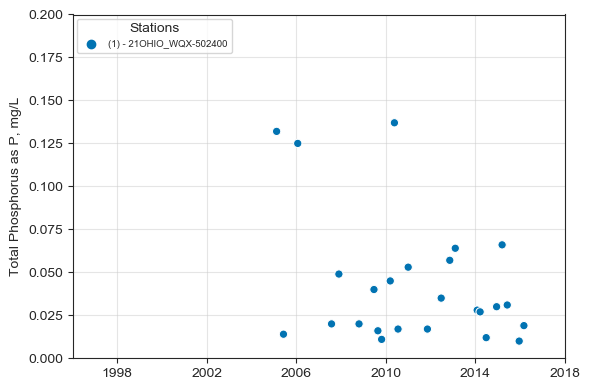

In [91]:

fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=selected_stations, hue='MonitoringLocationIdentifier', palette=pt)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc=2)

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,0.2)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('One_by_one/Western/US/'+river+'/'+river+'_TP.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_TP.pdf')



In [92]:
print(sp.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().reindex(selected_stations).round(2).to_latex())


\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &   std &   min &   25\% &   50\% &   75\% &   max \\
MonitoringLocationIdentifier &        &       &       &       &       &       &       &       \\
\midrule
21OHIO\_WQX-502400            &   25.0 &  0.04 &  0.04 &  0.01 &  0.02 &  0.03 &  0.05 &  0.14 \\
\bottomrule
\end{tabular}



In [93]:
selected_stations

['21OHIO_WQX-502400']

In [94]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = ['HTLP (NCWQR)']
master_st_df = sp[sp.MonitoringLocationIdentifier.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

(28, 63)

In [95]:
master_st_df.groupby('ActivityStartDate').mean().shape

(28, 6)

In [96]:
master_st_df[master_st_df.MonitoringLocationIdentifier.isin(master_stations)][[
    'ActivityStartDate','USGSPCode', 'ResultMeasureValue']].groupby('ActivityStartDate').mean().reset_index().sort_values('ActivityStartDate').to_csv(
    'One_by_one/Western/US/'+river+'/TP_'+river+'iver_data.csv', index=False)

### Discharge

In [31]:
# Finde station here:
# https://www.hydrocloud.org
site = '04209000'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
discharge = hf.extract_nwis_df(response.json())

In [32]:
discharge.columns

Index(['USGS:04209000:00060:00003', 'USGS:04209000:00060:00003_qualifiers'], dtype='object')

In [33]:
discharge['Flow, CFS']=discharge['USGS:'+site+':00060:00003']

In [34]:
discharge= discharge.reset_index()
discharge['Date']  = discharge['datetime']
discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
discharge = discharge[['Date', 'Flow, CFS']]
discharge['Source'] = 'USGS-'+site

In [35]:
discharge[discharge.Source=='USGS-'+site][['Date', 'Flow, CFS']].dropna().to_csv('One_by_one/Western/US/'+river+'/Flow_'+river+'_CFS.csv', index=False)


In [97]:
# df_Q_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/Flow_Cuyahoga_River_data.csv')
# df_Q_heideleberg['Date'] =pd.to_datetime(df_Q_heideleberg['Date'], errors='coerce')
# df_Q_heideleberg['Source'] = 'HTLP (NCWQR)'
# df_Q_heideleberg['Discharge, cms'] = 0.028*df_Q_heideleberg['Flow, CFS']


In [104]:
# discharge = discharge.append(df_Q_heideleberg)

In [36]:
discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']

In [37]:
river

'Chagrin_R'

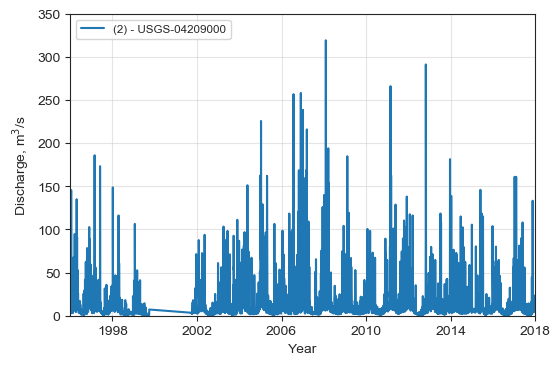

In [97]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['(2) - USGS-'+site], loc=2, fontsize='small')
ax.set_ylim(0,350)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('One_by_one/Western/US/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_Q.pdf')

In [98]:
discharge[['Date', 'Flow, CFS']].to_csv('One_by_one/Western/US/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### EGRET Results

In [3]:
river

'Chagrin_R'

In [4]:

EGRET_Daily = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US/One_by_one/Western/US/'+river+'/EGRET Result/TP/'+river+'iver_TP_Daily.csv')
EGRET_Sample = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US/One_by_one/Western/US/'+river+'/EGRET Result/TP/'+river+'iver_TP_Sample.csv')


In [5]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


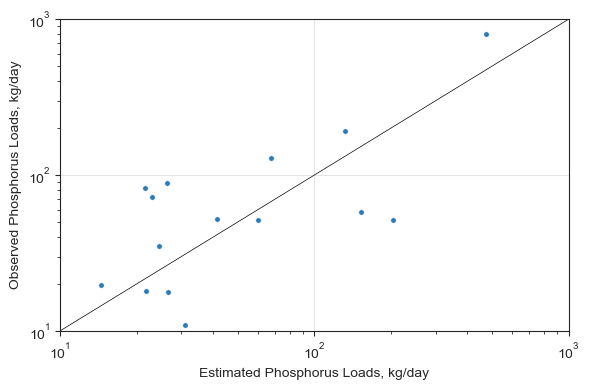

In [6]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,1000000],[-100,1000000], 'k', lw=0.5)
lim=10**3
plt.xlim(10,lim)
plt.ylim(10,lim)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_FvsF.pdf')


In [7]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


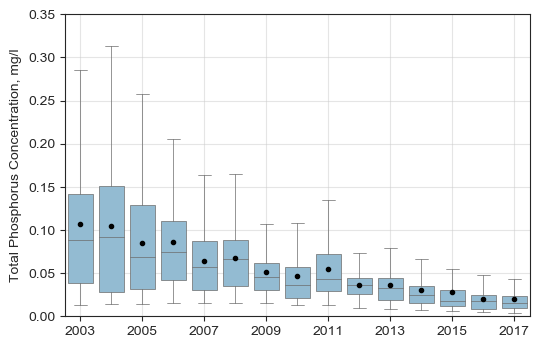

In [8]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(4.5, 19.5)
plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
plt.ylim(0,0.35)

plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus Concentration, mg/l")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_PC.pdf')




In [9]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




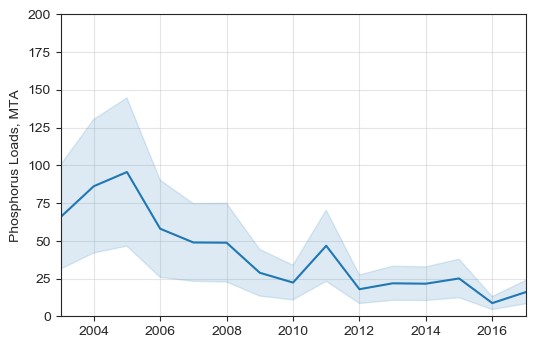

In [10]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

plt.plot(EGRET_Daily_an['waterYear'], EGRET_Daily_an['FluxYearMTA'], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'],
                 EGRET_Daily_an['FluxYearMTA']-EGRET_Daily_an['Fx_SE'],
                 EGRET_Daily_an['FluxYearMTA']+EGRET_Daily_an['Fx_SE'], 
                 color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Phosphorus Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_PFlux.pdf')


In [60]:
print(EGRET_Daily_an[['waterYear', 'FluxYearMTA','Fx_SE']].round(1).to_latex(index=False))

\begin{tabular}{rrr}
\toprule
 waterYear &  FluxYearMTA &  Fx\_SE \\
\midrule
      1996 &        153.9 &   82.8 \\
      1997 &        157.3 &   82.1 \\
      1998 &         99.3 &   51.4 \\
      1999 &         51.0 &   27.0 \\
      2002 &         52.8 &   27.8 \\
      2003 &         65.7 &   34.5 \\
      2004 &         86.1 &   44.2 \\
      2005 &         95.5 &   49.1 \\
      2006 &         58.0 &   32.2 \\
      2007 &         48.9 &   25.7 \\
      2008 &         48.7 &   26.0 \\
      2009 &         28.8 &   15.4 \\
      2010 &         22.3 &   11.5 \\
      2011 &         46.7 &   23.5 \\
      2012 &         17.9 &    9.5 \\
      2013 &         21.8 &   11.3 \\
      2014 &         21.6 &   11.1 \\
      2015 &         25.1 &   12.8 \\
      2016 &          8.7 &    4.3 \\
      2017 &         16.0 &    7.7 \\
      2018 &         13.3 &    6.6 \\
      2019 &          4.1 &    2.3 \\
\bottomrule
\end{tabular}



In [127]:
EGRET_Daily.groupby(['waterYear'])['FluxYearMTA'].describe()

,count,mean,std,min,25%,50%,75%,max
waterYear,,,,,,,,
1982,285.0,461.120906,493.811642,67.024914,146.094188,291.973136,548.257836,3259.952051
1983,345.0,435.042420,638.893104,79.234890,131.811197,250.702089,476.169298,7703.830958
1984,346.0,480.738207,713.687475,54.915851,126.484353,223.651173,551.097762,5707.548882
1985,353.0,361.186693,624.624070,54.542258,109.658390,168.960981,339.196575,5585.546118
1986,353.0,400.181318,608.906499,35.355199,94.955786,180.221050,466.685495,5186.141908
1987,341.0,313.482684,554.730371,61.388465,93.697576,144.972097,283.280035,4977.332821
1988,279.0,144.520872,204.798047,24.537320,51.328183,88.229796,145.558588,1823.809171
1989,303.0,290.700666,663.435857,24.207118,68.169536,104.250747,223.842450,7641.164020
1990,220.0,274.205416,488.340701,25.501454,84.701311,146.877283,259.460613,5175.050247
